# Linear Regression model from scratch in python

### Intial script

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### loading dataset

In [2]:
path = os.getcwd()
for i in range(3):
    path = os.path.dirname(path)
data = pd.read_csv( path + '/Datasets/HeadBrain.csv')

In [3]:
data

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
5,1,1,3585,1300
6,1,1,3785,1400
7,1,1,3559,1255
8,1,1,3613,1355
9,1,1,3982,1375


In [4]:
data.shape

(237, 4)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
Gender                 237 non-null int64
Age Range              237 non-null int64
Head Size(cm^3)        237 non-null int64
Brain Weight(grams)    237 non-null int64
dtypes: int64(4)
memory usage: 7.5 KB


### Let's plot a scatter plot for Head Size again Brain Weight

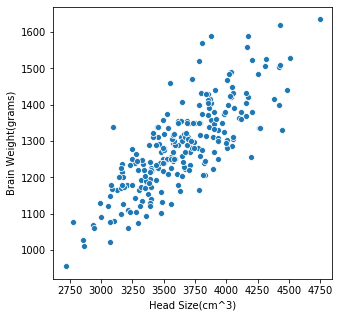

In [8]:
plt.figure(figsize=(5,5))
sns.scatterplot(y='Brain Weight(grams)',x='Head Size(cm^3)',data=data)
plt.show()

We are interested only the Head Size(independent) and Brain Weight(dependent) for this exercise, so let's get in X and Y

In [9]:
X = data['Head Size(cm^3)']
Y = data['Brain Weight(grams)']

In [12]:
X.shape

(237,)

In [13]:
Y.shape

(237,)

Linear Regression model are used to show or predict the relationship between a dependent variable (target variable) and independent variable(s). It can be used to check if there exists any correlation between the variables.

- **Simple Linear Regression ->** relationship between just two variables (a dependent Vs an independent)
- **Multiple Regression ->** relationship between two or more variables ( a dependent Vs 2 or more independent)

The current data set in an example of Simple Linear Regression. We have a target or the dependent variable,which is Brain Weight. The independent variable here is the Head Size.

The formula goes like this -

> y = mx+c

Where ,

c - is the y-intercept

m - is the slope / coefficient -> this quantity effects the values of y

In our example -

**BrainWeight = m * HeadSize + constant**

**constant = BrainWeight - (m * HeadSize)**

### Calculate the slope and y-intercept

In [14]:
def calculateSlopeAndIntercept(X, Y):
	# mean_x = round(np.mean(X),2)
	# mean_y  = round(np.mean(Y),2)
	mean_x = 0
	mean_y  = 0

	for i in range(0,len(X)):
		mean_x=mean_x+X[i]
		mean_y=mean_y+Y[i]

	mean_x=round(mean_x/len(X),2)
	mean_y=round(mean_y/len(Y),2)

	n = len(X)

	# slope (m) = sum(x[i] - mean_x)(y[i] - mean_y)/sum(x[i]-mean_x ** 2)

	numerator = 0
	denominator = 0

	for i in range(n):
		numerator += ((X[i] - mean_x) * (Y[i] - mean_y))
		denominator += ((X[i] - mean_x) ** 2)

	m = round((numerator/denominator),2)

	c = mean_y - (m * mean_x)

	return m,c

In [15]:
def predict(X, m, c):
	pred_y = []

	for i in range(len(X)):
		pred_y.append(c + (m * X[i]))

	return(pred_y)

### Now let's calculate the R-Square value (Coefficient of determination)

y_obs -> observed data

y_pred -> predicted value of y from the formula (y=mx+c)

y_hat -> mean of y_obs

total_sum_of_squares(ss_tot) -> sum( (y_obs - y_hat) ** 2 )

sum_of_squares(ss_res) -> sum( (y_obs - y_pred) ** 2 )

r2 -> 1 - total_sum_of_squares/sum_of_squares

In [16]:
def calculate_R_square(Y_test, Y_pred):

	mean_y = np.mean(Y_test)

	# R-square = 1 - [(sum(y_test[i] - y_pred[i] )**2)/(sum(y_test[i] - mean_y)**2)

	numerator = 0
	denominator = 0

	for i in range(len(Y_test)):
		numerator += ((Y_test[i] - Y_pred[i]) ** 2)
		denominator += ((Y_test[i] - mean_y) ** 2)

	r2 = 1 - (numerator/denominator)

	return r2

In [17]:
def train_test_split(dataset):
	training_data = dataset.iloc[:191].reset_index(drop = True)
	testing_data = dataset.iloc[191:].reset_index(drop = True)

	return training_data, testing_data

In [19]:
training_data = train_test_split(data)[0]
testing_data = train_test_split(data)[1]

X_train = training_data['Head Size(cm^3)']
Y_train = training_data['Brain Weight(grams)']

X_test = testing_data['Head Size(cm^3)']
Y_test = testing_data['Brain Weight(grams)']

### Let's calulate the Linear Regression and plot the data points

In [22]:
m,c = calculateSlopeAndIntercept(X_train, Y_train)
print("Slope of regression line : ", m)
print("Y-intercept of the line : ", c)

predictions = predict(X_test, m, c)
r2 = calculate_R_square(Y_test, predictions)
print("R-Squared value : ",r2)

Slope of regression line :  0.25
Y-intercept of the line :  379.3549999999999
R-Squared value :  0.6430443926657197


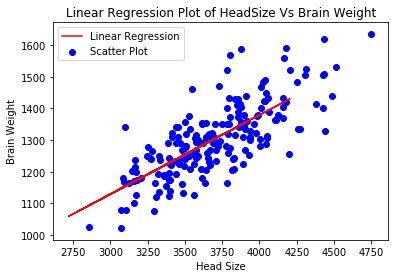

In [24]:
plt.title("Linear Regression Plot of HeadSize Vs Brain Weight")
plt.plot(X_test,predictions,color='red',label='Linear Regression')
plt.scatter(X_train,Y_train,c='b',label='Scatter Plot')
plt.xlabel("Head Size")
plt.ylabel("Brain Weight")
plt.legend()
plt.show()